# 实现梯度下降算法

在该 Lab 中，我们将实现梯度下降算法的基本函数，以便在小数据集中查找数据边界。 首先，我们将从一些函数开始，帮助我们绘制和可视化数据。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## 读取与绘制数据

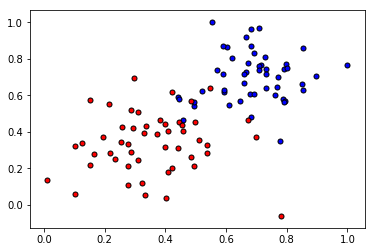

In [25]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

## 待办： 实现基本函数

现在轮到你练习了。 如之前所述，实现以下基本函数。

- Sigmoid 激活函数

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- 输出（预测）公式

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- 误差函数

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- 更新权重的函数

$$ w_i^{'} \longleftarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b^{'} \longleftarrow b + \alpha (y - \hat{y})$$

In [23]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return -y * np.log(output) - (1 - y) * np.log(1 - output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    y_predict = output_formula(x, weights, bias)
    weights = weights + learnrate * (y - y_predict) * x
    bias = bias + learnrate * (y - y_predict)
    return weights, bias

## 训练函数

该函数将帮助我们通过所有数据来迭代梯度下降算法，用于多个 epoch。 它还将绘制数据，以及在我们运行算法时绘制出一些边界线。

In [4]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## 是时候来训练算法啦！

当我们运行该函数时，我们将获得以下内容：

- 目前的训练损失与准确性的 10 次更新
- 获取的数据图和一些边界线的图。 最后一个是黑色的。请注意，随着我们遍历更多的 epoch ，线会越来越接近最佳状态。
- 误差函数的图。 请留意，随着我们遍历更多的 epoch，它会如何降低。


========== Epoch 0 ==========
Train loss:  0.72595505099
Accuracy:  0.32

========== Epoch 10 ==========
Train loss:  0.627256125339
Accuracy:  0.57

========== Epoch 20 ==========
Train loss:  0.559215387104
Accuracy:  0.73

========== Epoch 30 ==========
Train loss:  0.505620339456
Accuracy:  0.82

========== Epoch 40 ==========
Train loss:  0.463074078584
Accuracy:  0.89

========== Epoch 50 ==========
Train loss:  0.428758391391
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.400635844985
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.377241270588
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.357512960094
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.340671869614
Accuracy:  0.93


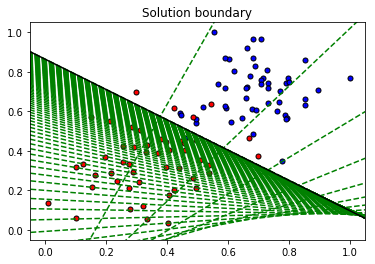

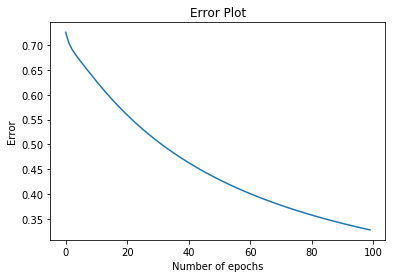

In [24]:
train(X, y, epochs, learnrate, True)